# Week 1: Q-Learning on FrozenLake

Welcome to Week 1! This week we’ll get hands-on with **Q-learning** using OpenAI Gym’s **FrozenLake-v1** environment. Your goal is to train a tabular Q-learning agent to navigate a slippery frozen lake without falling into holes.

Read about the FrozenLake environment from the openAI gymnasium website and try to solve this assignment

## Goals

- Understand and implement Q-learning with a Q-table.
- Use an ε-greedy exploration strategy.
- Visualize training progress with reward curves.
- Evaluate the learned policy.


## Environment Setup

In [2]:
# !pip install gym==0.26.2 matplotlib numpy
# %pip install gym==0.26.2 matplotlib numpy

# %pip install pygame

In [3]:
#AttributeError: module 'numpy' has no attribute 'bool8'
#upgrading gym

# %pip install gymnasium

In [4]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import tqdm

# env = gym.make("FrozenLake-v1", is_slippery=False, render_mode="human")
env = gym.make("FrozenLake-v1", is_slippery=False)
state_space_size = env.observation_space.n
action_space_size = env.action_space.n
Q = np.zeros((state_space_size, action_space_size))

In [5]:
print(env.action_space)
print(env.observation_space)

Discrete(4)
Discrete(16)


actions and observations are just numbers from 0 to space_size-1

## Training Loop
Complete the training loop

In [16]:
def train_agent(episodes=2000, alpha=0.8, gamma=0.95, epsilon=1.0, decay=0.995):
    rewards = []
    for ep in tqdm.tqdm(range(episodes)):
        state = env.reset()[0]
        done = False
        total_reward = 0

        # adding max steps very important without it the agent will just roam aroung leading very very slow training 
        steps = 0
        greedy = False
        # path = [[0, 0]]
        
        while not done:
        
            #TODO select action
            if np.random.rand() < epsilon:
                action = env.action_space.sample()
                greedy = True
            else:
                action = np.argmax(Q[state])
                greedy = False

            # if (path[-1][1] - action) != 2:
            #     path.append([state, action])
            # else:
            #     path.pop()

            next_state, reward, done, truncated, _ = env.step(action) #uncomment this after adding algo to choose action_space_size

            if done and reward == 0:
                reward = -1
            
            #TODO Update The Q values
            Q[state][action] = Q[state, action] + alpha*(reward + gamma*np.max(Q[next_state]) - Q[state, action])
            # for choice in path:
            #     Q[choice] = 1
    
            state = next_state
            total_reward += reward
            steps += 1

        #TODO maybe try decaying epsilon between episodes
        epsilon *= decay
        # print(f"Episode: {ep+1}, Reward: {total_reward}")
        
        rewards.append(total_reward)
    return rewards

## Plotting Results

In [7]:
#run this to close pygame window dont do it manually

env.close()

In [8]:
Q = np.zeros((state_space_size, action_space_size))

  0%|          | 0/500 [00:00<?, ?it/s]

100%|██████████| 500/500 [00:02<00:00, 179.65it/s] 


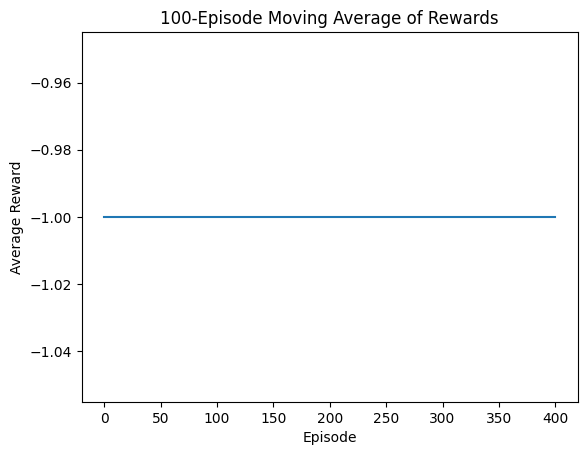

In [19]:
Q = np.zeros((state_space_size, action_space_size))
rewards = train_agent(episodes=500,gamma=0.95, alpha=0.8, decay=0.99)
plt.plot(np.convolve(rewards, np.ones(100)/100, mode='valid'))
# plt.plot(np.convolve(rewards, np.ones(100)/100, mode='valid'))
plt.title("100-Episode Moving Average of Rewards")
plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.show()
# print(rewards[1000:1100])

didnt even reach the end once in 500 episodes

100%|██████████| 500/500 [00:00<00:00, 6365.67it/s]


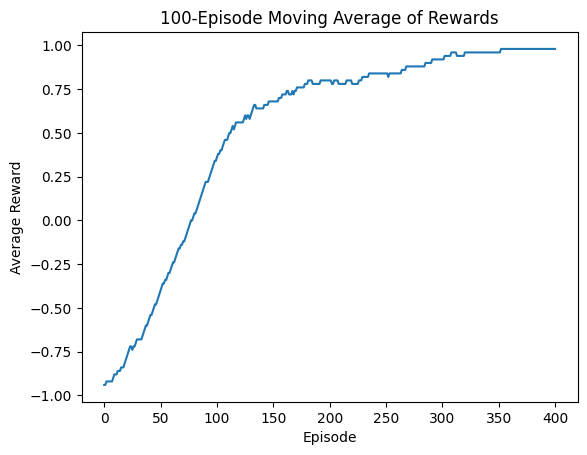

In [21]:
Q = np.zeros((state_space_size, action_space_size))
rewards = train_agent(episodes=500,gamma=0.95, alpha=0.8, decay=0.99)
plt.plot(np.convolve(rewards, np.ones(100)/100, mode='valid'))
# plt.plot(np.convolve(rewards, np.ones(100)/100, mode='valid'))
plt.title("100-Episode Moving Average of Rewards")
plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.show()
# print(rewards[1000:1100])

after 5-6 attempts we get some learning

## Test the Learned Policy

In [26]:
env_render = gym.make("FrozenLake-v1", is_slippery=True, render_mode="human")

def test_agent(Q, episodes=2):
    for ep in range(episodes):
        state = env_render.reset()[0]
        done = False
        print(f"Episode {ep + 1}")
        total_reward = 0
        while not done:
            action = np.argmax(Q[state])
            print(f"State: {state}, Action: {action}")
            next_state, reward, done, trunc, _ = env_render.step(action)
            env_render.render()
            state = next_state
            print(f"Truncated: {trunc}")
            total_reward += reward
        print(f"Total Reward: {total_reward}")

In [28]:
#run this to close pygame window dont do it manually

env_render.close()

In [27]:
env_render = gym.make("FrozenLake-v1", is_slippery=False, render_mode="human")

test_agent(Q)

Episode 1
State: 0, Action: 1
Truncated: False
State: 4, Action: 1
Truncated: False
State: 8, Action: 2
Truncated: False
State: 9, Action: 2
Truncated: False
State: 10, Action: 1
Truncated: False
State: 14, Action: 2
Truncated: False
Total Reward: 1.0
Episode 2
State: 0, Action: 1
Truncated: False
State: 4, Action: 1
Truncated: False
State: 8, Action: 2
Truncated: False
State: 9, Action: 2
Truncated: False
State: 10, Action: 1
Truncated: False
State: 14, Action: 2
Truncated: False
Total Reward: 1.0


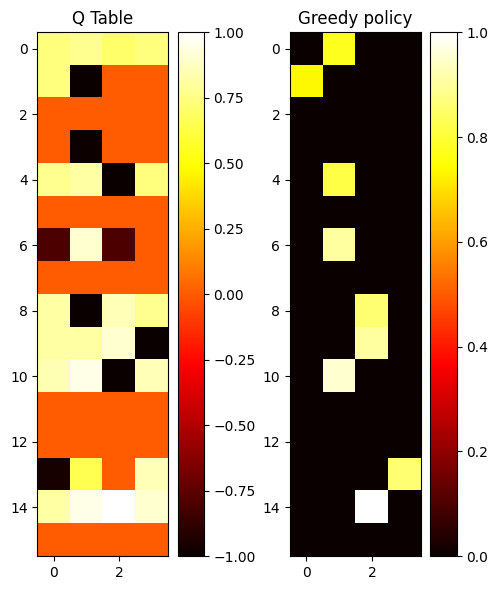

D L L L 
D L D L 
R R D L 
L U R L 
0.77  0.74  0.00  0.00  
0.81  0.00  0.90  0.00  
0.86  0.90  0.95  0.00  
0.00  0.86  1.00  0.00  


In [40]:
fig, (ax1, ax2) = plt.subplots(figsize=(5, 6), ncols=2)

plt.subplot(1, 2, 1)
plot = ax1.imshow(Q, cmap='hot', interpolation='nearest')
plt.title("Q Table")
fig.colorbar(plot, ax=ax1)
# plt.show()

plt.subplot(1, 2, 2)
plot = ax2.imshow(Q*(Q == Q.max(axis=1)[:, np.newaxis]), cmap='hot', interpolation='nearest')
plt.title("Greedy policy")
fig.colorbar(plot, ax=ax2)
plt.tight_layout()
plt.show()

for i in range(4):
    for j in range(4):
        match Q.argmax(axis=1).reshape(4, 4)[i][j]:
            case 0:
                print("L ", end="")
            case 1:
                print("D ", end="")
            case 2:
                print("R ", end="")
            case 3:
                print("U ", end="")
    print()
for i in range(4):
    for j in range(4):
        # match Q.argmax(axis=1).reshape(4, 4)[i][j]:
        #     case 0:
        #         print("L ", end="")
        #     case 1:
        #         print("D ", end="")
        #     case 2:
        #         print("R ", end="")
        #     case 3:
        #         print("U ", end="")
        print(f"{Q.max(axis=1).reshape(4,4)[i][j]:.2f}", end="  ")
    print()


# print(Q)
# print(Q[Q.argmax(axis=1)[:, np.newaxis]])


# fig.savefig(fname="noslip_400k_episode")

# action space
#   0 - left
#   1 - down
#   2 - right
#   3 - up

The closer we get to the end the q values get bigger(whiter)<br>
since rewards were only given at the end and gamma < 1 <br><br>
This creates a "gradient" of values which leads to agent to the end, with gamma=1 this does not from causing any learning to fail.

## Challenges

1. Set `is_slippery=False` and compare performance.
2. Change the reward for falling into holes.
3. Add a decaying learning rate `α = α0 / (1 + decay * t)`.
4. Visualize the Q-table as a heatmap (optional).
5. Maybe try to think about how to generalize this to solve a random lake without pretraining on the specific environment(Post your ideas on the whatsapp group and we will host a competition if people are interested)


Learn how to implement tabular Q-learning to solve a simple environment. Use exploration, value updates, and reward tracking to build intuition before moving to deep RL.



##### The methods we used are very bad, they rely on complete chance to find the end and even after finding the end once it cant learn the path<br>
##### it needs multiple random runs to just learn this path, and even after that it cant solve any other maze
##### each time it reaches the end randomly one more state in the path gets updated and eventually one by one all states in the path get updated and the optimal policy learned

# Learnings

##### the state action values are the actually the probabilites(not exactly the acutal prob. beacause gamma < 1, and we dont use alpha = 1/k, but close to them ) of winning/reaching the end since only +1 reward is given at the end
## Slippery
### max steps
adding this helped since often during training the agent would get stuck leading to very slow training<br><br>

but with max step <= 100(default for 4x4 maze per episode is 100)<br>
intially due to very sparse rewards it had to learn to get from start to end by complete chance and 100 steps was not enough <br>
for that which often lead to 0 rewards ie never reaching end in the whole of 2k epochs

with slip the agent learns to never more perpendicular to lakes since it risks him falling down.<br>
ie if there is a lake adjacent to player,  move in direction opposite to lake even if there's a wall there.<br><br>

but by doing this the agent relies on the random 1/3 chance of actually moving in the correct direction <br>
and due to this and the structure of the map it is impossible to guarantee reaching the end even after following optimal policy<br><br>

plus in slippery you are not guarnteed to reach end in <= 100 timesteps(due to the 1/3 transition probabilites) hence sometimes we would get 0 reward without even falling in a lake<br>

Hence we dont see see rewards converge to 1 during training and they converge to a value less than 1

## 20k vs 2k epochs

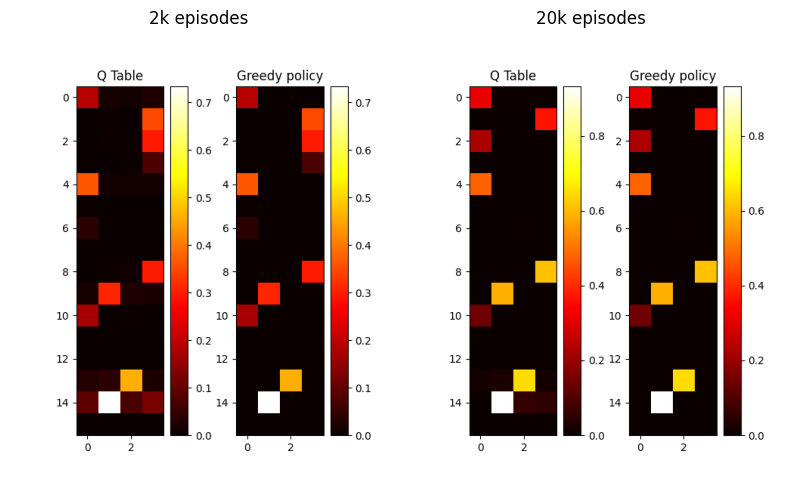

In [ ]:
import matplotlib.image as mpimg

# Load the image
fig, (ax1, ax2) = plt.subplots(figsize=(8,12), ncols=2)
img = mpimg.imread("slip_2k_episode.png")

# Display the image
ax1.axis('off') # Turn off axes
ax1.set_title("2k episodes")
ax1.imshow(img)
# plt.show()

img = mpimg.imread("slip_20k_episode.png")

# Display the image
ax2.axis('off') # Turn off axes
ax2.set_title("20k episodes")
ax2.imshow(img)
plt.tight_layout()
plt.show()

as we go further away from end the state values decrease because
1. The main reason: gamma < 1, as the values slowly reach the start the +1 at the end becomes less valuable hence we dont get values = 1 for all states from where it is possible to reach the end.
2. The further away from the end you are the lesser is the probability of reaching the end, you might get stuck in between or end up in a lake, hence the values are lower



## no slip

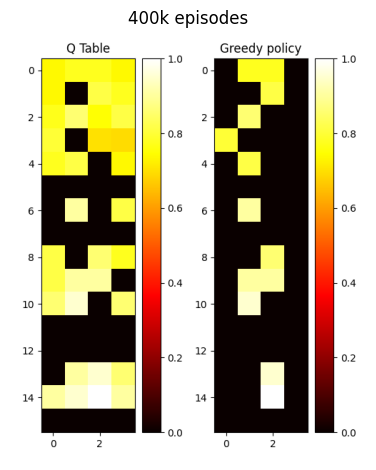

In [50]:
import matplotlib.image as mpimg

# Load the image
# fig, (ax1, ax2) = plt.subplots(figsize=(8,12), ncols=2)
img = mpimg.imread("noslip_400k_episode.png")

# Display the image
plt.axis('off') # Turn off axes
plt.title("400k episodes")
plt.imshow(img)
plt.tight_layout()
plt.show()

after this many epochs all non-hole states have value close to 1

### gamma
if gamma=1 all non hole states become 1 hence going both away or close to the end gives us next states which have value 1 causing the agent to get stuck, if gamma is less than one then the action which lead you closer to the end has more value since the reward for it has be discounted less <br><br>

Thus for this environment gamma < 1 is very important to have, it helps create a kind of gradient towards the end

D L L L <br>
D L D L <br>
R R D L <br>
L U R L <br>
0.77  0.74  0.00  0.00  <br>
0.81  0.00  0.90  0.00  <br>
0.86  0.90  0.95  0.00  <br>
0.00  0.86  1.00  0.00  <br>